# Sprawozdanie 1
## Jakub Ciągło (275986), Mateusz Ćwiek (276011)

___
# Importy

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

___
# Część 1
## Zadanie 1

___
**1. Przygotowanie danych do analizy**

W pierwszym etapie analizy danych dokonaliśmy wczytania pliku z danymi za pomocą funkcji `pd.read_csv()`, korzystając z odpowiedniego kodowania `Latin2` oraz separatora `;`, zgodnie z formatem pliku. Następnie przeprowadziliśmy wstępną inspekcję danych, wykorzystując metodę `info()`, która pozwoliła nam uzyskać podstawowe informacje o strukturze zbioru danych, takie jak liczba wierszy, liczba zmiennych oraz typy danych w poszczególnych kolumnach.

Kolejnym krokiem było sprawdzenie unikalnych wartości w każdej z kolumn za pomocą pętli, która dla każdej kolumny wyświetliła unikalne wartości. Dzięki temu mogliśmy szybko zweryfikować, czy wartości w danych są zgodne z oczekiwaniami, a także czy nie występują nieoczekiwane lub błędne wpisy.


In [3]:
df = pd.read_csv("ankieta.csv", encoding="Latin2", sep=";")

print("Informacje o danych:")
print(df.info())

print("\nUnikalne wartości w każdej kolumnie:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DZIAŁ     200 non-null    object
 1   STAŻ      200 non-null    int64 
 2   CZY_KIER  200 non-null    object
 3   PYT_1     200 non-null    int64 
 4   PYT_2     200 non-null    int64 
 5   PYT_3     200 non-null    int64 
 6   PŁEĆ      200 non-null    object
 7   WIEK      200 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 12.6+ KB
None

Unikalne wartości w każdej kolumnie:
DZIAŁ: ['IT' 'PD' 'MK' 'HR']
STAŻ: [2 3 1]
CZY_KIER: ['Nie' 'Tak']
PYT_1: [ 1  0 -1  2 -2]
PYT_2: [-2  2  1 -1]
PYT_3: [ 1 -2  2 -1]
PŁEĆ: ['M' 'K']
WIEK: [64 67 65 68 57 58 56 47 48 53 54 37 45 43 34 27 60 52 50 51 28 26 25 32
 33 30 29 35 40 39 36 44 41 49 55 62 59 38 42 46 63 70 61]


Dane zawierają 200 kompletnych obserwacji bez braków, typy zmiennych są zgodne z oczekiwaniami. Kolumna DZIAŁ obejmuje działy IT, PD, MK oraz HR, natomiast STAŻ oraz odpowiedzi na pytania PYT_1, PYT_2 i PYT_3 przyjmują wartości liczbowe zgodne z opisem. Zmienna CZY_KIER zawiera odpowiedzi „Tak” lub „Nie”, a płeć oznaczona jest jako M lub K. Wiek respondentów mieści się w zakresie od 25 do 67 lat, co wskazuje na brak nietypowych wartości. Dane można uznać za poprawne i gotowe do dalszej analizy.

___
**2. Kategoryzacja zmiennej WIEK**

W kolejnym etapie analizy, w celu uzyskania bardziej przystępnej reprezentacji danych, przeprowadziliśmy kategoryzację zmiennej **WIEK**. Zmienną **WIEK_KAT** utworzyliśmy, dzieląc dane na cztery przedziały wiekowe: do 35 lat, pomiędzy 36 a 45 lat, pomiędzy 46 a 55 lat, oraz powyżej 55 lat. Do tego celu wykorzystaliśmy funkcję `pd.cut()`, definiując odpowiednie przedziały za pomocą parametrów `bins` oraz przypisując etykiety przedziałom wiekowym w parametrze `labels`. Dodatkowo, ustawiliśmy parametr `right=True`, aby przedziały obejmowały górną granicę.

In [4]:
df['WIEK_KAT'] = pd.cut(df['WIEK'], 
                        bins=[0, 35, 45, 55, float('inf')], 
                        labels=['do 35 lat', '36-45 lat', '46-55 lat', 'powyżej 55 lat'],
                        right=True)

print(df[['WIEK', 'WIEK_KAT']])

     WIEK        WIEK_KAT
0      64  powyżej 55 lat
1      67  powyżej 55 lat
2      65  powyżej 55 lat
3      68  powyżej 55 lat
4      65  powyżej 55 lat
..    ...             ...
195    42       36-45 lat
196    35       do 35 lat
197    39       36-45 lat
198    48       46-55 lat
199    42       36-45 lat

[200 rows x 2 columns]


___
**3. Tablica liczności dla zmiennych**

W kolejnym etapie analizy danych, sporządziliśmy tablice liczności dla zmiennych: **DZIAŁ**, **STAŻ**, **CZY_KIER**, **PŁEĆ**, oraz **WIEK_KAT**. Użyliśmy funkcji `value_counts()` do obliczenia liczby wystąpień poszczególnych wartości w każdej z tych zmiennych. Dla każdej z wymienionych zmiennych uzyskaliśmy tabelę przedstawiającą liczbę przypadków przypisanych do poszczególnych kategorii.

In [5]:
zmienne = ['DZIAŁ', 'STAŻ', 'CZY_KIER', 'PŁEĆ', 'WIEK_KAT']

for zmienna in zmienne:
    print(f"\nTabela liczności dla {zmienna}:")
    print(df[zmienna].value_counts())


Tabela liczności dla DZIAŁ:
DZIAŁ
PD    98
MK    45
HR    31
IT    26
Name: count, dtype: int64

Tabela liczności dla STAŻ:
STAŻ
2    140
1     41
3     19
Name: count, dtype: int64

Tabela liczności dla CZY_KIER:
CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64

Tabela liczności dla PŁEĆ:
PŁEĆ
M    129
K     71
Name: count, dtype: int64

Tabela liczności dla WIEK_KAT:
WIEK_KAT
36-45 lat         104
46-55 lat          45
do 35 lat          26
powyżej 55 lat     25
Name: count, dtype: int64


Najliczniej reprezentowanym działem jest PD (98 osób), a najmniej licznym IT (26 osób). Zdecydowana większość respondentów (140 osób) ma staż pracy oznaczony jako „2” (między jednym a trzema latami pracy). Tylko 27 osób zajmuje stanowiska kierownicze („Tak”). W grupie dominuje płeć męska (129 osób). Najliczniejszą grupą wiekową są osoby w przedziale 46-55 lat (45 osób), natomiast najmniej liczna grupa to osoby powyżej 55 lat (25 osób).

___
**4. Wykresy słupkowe i kołowe dla zmiennych PYT_1 oraz PYT_2**  

W tej części analizy sporządziliśmy wykresy słupkowe i kołowe dla zmiennych **PYT_1** oraz **PYT_2**, aby zobrazować rozkład odpowiedzi respondentów. Do wygenerowania wykresów wykorzystaliśmy metodę `value_counts()`, która pozwoliła określić liczność poszczególnych kategorii odpowiedzi. Wykres słupkowy został utworzony za pomocą `plt.bar()`, co umożliwiło porównanie częstości występowania odpowiedzi. Wykres kołowy wygenerowaliśmy przy użyciu `plt.pie()`, co pozwoliło przedstawić udział każdej kategorii w całości próby. 

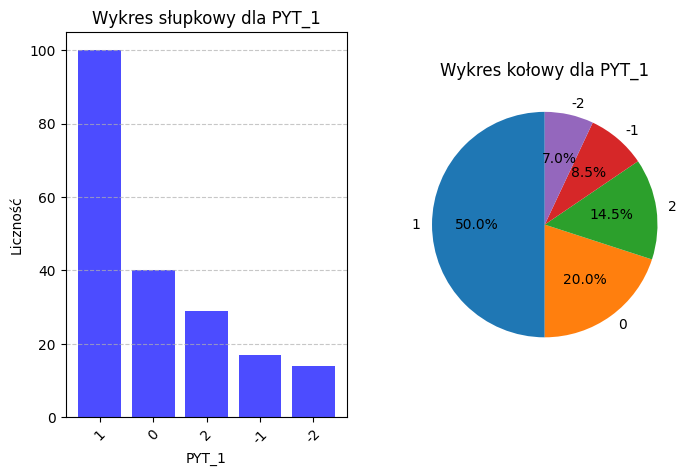

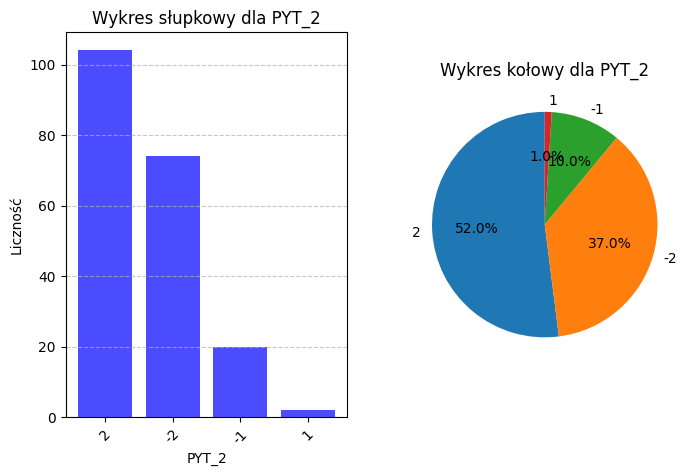

In [8]:
pytania = ['PYT_1', 'PYT_2']

for pytanie in pytania:
    counts = df[pytanie].value_counts()

    plt.figure(figsize=(8, 5))
    plt.subplot(1,2,1)
    plt.bar(counts.index.astype(str), counts.values, color='blue', alpha=0.7)
    plt.xlabel(pytanie)
    plt.ylabel("Liczność")
    plt.title(f"Wykres słupkowy dla {pytanie}")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.subplot(1,2,2)
    plt.pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%', startangle=90)
    plt.title(f"Wykres kołowy dla {pytanie}")
    plt.show()


Większość respondentów pozytywnie ocenia wsparcie i materiały zapewniane przez firmę umożliwiające skuteczne wykorzystanie wiedzy ze szkoleń (PYT_1). Połowa badanych zgadza się z tym stwierdzeniem, a kolejne 14,5% zdecydowanie się zgadza.  Neutralne stanowisko zajmuje 20%, a negatywnych opinii jest łącznie 15,5%. 

Natomiast w przypadku pytania PYT_2, dotyczącego dostosowania szkoleń do indywidualnych potrzeb i wsparcia rozwoju zawodowego oraz awansu, respondenci mają bardzo spolaryzowane opinie. Nieco ponad połowa ankietowanych (52%) zdecydowanie się zgadza ze stwierdzeniem, natomiast aż 47% wyraża niezadowolenie (z czego aż 37% zdecydowanie się nie zgadza, a 10% umiarkowanie). Pozostały 1% nie ma zdania. Wyniki te sugerują, że choć większość pracowników dostrzega pozytywny aspekt dostosowania szkoleń, istnieje jednak duża grupa, dla której te działania firmy nie spełniają oczekiwań.

___
**5. Tablice wielodzielcze dla wybranych par zmiennych**  

W tej części analizy sporządziliśmy tablice wielodzielcze dla par zmiennych: **PYT_1 i DZIAŁ**, **PYT_1 i STAŻ**, **PYT_1 i CZY_KIER**, **PYT_1 i PŁEĆ**, oraz **PYT_1 i WIEK_KAT**.  

Do utworzenia tabel zastosowaliśmy funkcję `pd.crosstab()`, która umożliwiła zestawienie liczności poszczególnych kategorii zmiennej **PYT_1** z kategoriami zmiennych towarzyszących. Dzięki temu możliwe było sprawdzenie, jak odpowiedzi na **PYT_1** są rozłożone w różnych grupach badanych.  

In [9]:
pary_zmiennych = [('PYT_1', 'DZIAŁ'), 
                  ('PYT_1', 'STAŻ'), 
                  ('PYT_1', 'CZY_KIER'), 
                  ('PYT_1', 'PŁEĆ'), 
                  ('PYT_1', 'WIEK_KAT')]

for zmienna1, zmienna2 in pary_zmiennych:
    print(f"\nTabela wielodzielcza dla {zmienna1} i {zmienna2}:")
    tabela = pd.crosstab(df[zmienna1], df[zmienna2])
    print(tabela)



Tabela wielodzielcza dla PYT_1 i DZIAŁ:
DZIAŁ  HR  IT  MK  PD
PYT_1                
-2      2   0   3   9
-1      2   2   3  10
 0      5   4  14  17
 1     19  15  15  51
 2      3   5  10  11

Tabela wielodzielcza dla PYT_1 i STAŻ:
STAŻ    1   2  3
PYT_1           
-2      5   5  4
-1      6  10  1
 0      8  26  6
 1     19  75  6
 2      3  24  2

Tabela wielodzielcza dla PYT_1 i CZY_KIER:
CZY_KIER  Nie  Tak
PYT_1             
-2         10    4
-1         14    3
 0         34    6
 1         88   12
 2         27    2

Tabela wielodzielcza dla PYT_1 i PŁEĆ:
PŁEĆ    K   M
PYT_1        
-2      3  11
-1      7  10
 0     14  26
 1     36  64
 2     11  18

Tabela wielodzielcza dla PYT_1 i WIEK_KAT:
WIEK_KAT  do 35 lat  36-45 lat  46-55 lat  powyżej 55 lat
PYT_1                                                    
-2                1         11          2               0
-1                6          7          1               3
 0                3         24          5              

Oczywiście, zgodnie z wykresami słupkowymi i kołowymi, najwięcej odpowiedzi zawsze pada na wartość "1" (umiarkowana zgoda). Dział PD ma najwięcej pozytywnych ocen (łącznie 62 osoby wskazały odpowiedzi pozytywne: 51 umiarkowanie, 11 zdecydowanie). Najwięcej ocen negatywnych ("-2" i "-1") pojawia się także w dziale PD (łącznie 19 osób), ale jest to jednocześnie dział o największej liczebności, dlatego procentowo niekoniecznie musi być najbardziej krytyczny. W przypadku stażu pracy osoby ze stażem 1–3 lat udzielają najwięcej pozytywnych ocen (łącznie 99 osób), co może wynikać z faktu, że jest to najliczniejsza grupa (140 osób). Osoby niepełniące funkcji kierowniczych stanowią zdecydowaną większość (173 osoby), stąd też dominacja pozytywnych odpowiedzi ("1") jest tu szczególnie widoczna (88 osób). Biorąc pod uwagę płeć, zarówno kobiety, jak i mężczyźni najczęściej udzielają odpowiedzi pozytywnych, jednak mężczyźni są znacznie liczniejszą grupą. Z kolei analiza wieku wskazuje, że najwięcej pozytywnych opinii pochodzi od osób w przedziale 36–45 lat (łącznie 62 osoby). Najbardziej krytyczne opinie ("-2") również najczęściej występują w tej grupie wiekowej (11 osób), co wynika także z dużej liczebności tej grupy. 

___
**6. Tablica wielodzielcza dla zmiennych PYT_2 i PYT_3**  

W tej części analizy utworzyliśmy tablicę wielodzielczą dla zmiennych **PYT_2** i **PYT_3**. Do jej wygenerowania również zastosowaliśmy funkcję `pd.crosstab()`, która pozwoliła zestawić liczność poszczególnych kategorii odpowiedzi dla obu zmiennych.  


In [10]:
tabela_6 = pd.crosstab(df['PYT_2'], df['PYT_3'])
print(tabela_6)

PYT_3  -2  -1   1   2
PYT_2                
-2     49  16   5   4
-1      3   6  10   1
 1      0   0   2   0
 2      0   8  15  81


Można zauważyć, że większość respondentów, którzy wcześniej wyrażali zdecydowanie pozytywną opinię (PYT_2 = 2), nadal utrzymuje ją po przeprowadzonych szkoleniach (81 z 104 osób). Spośród osób zdecydowanie niezadowolonych (PYT_2 = -2), większość pozostała negatywnie nastawiona (49 z 74 osób, czyli około 66%), lecz 9 osób (około 12%) zmieniło swoją opinię na pozytywną. Z kolei spośród respondentów umiarkowanie niezadowolonych (PYT_2 = -1), zmiana na pozytywną opinię była jeszcze bardziej widoczna – aż 11 z 20 osób (55%) oceniło szkolenia pozytywnie po ich zakończeniu. Wnioski wskazują, że cykl szkoleń był szczególnie skuteczny w przypadku osób umiarkowanie niezadowolonych, natomiast miał stosunkowo niewielki wpływ na najbardziej krytycznie nastawionych pracowników.

___
**7. Utworzenie zmiennej CZY_ZADOW na podstawie PYT_2**  

W tej części analizy utworzyliśmy nową zmienną **CZY_ZADOW**, która grupuje kategorie odpowiedzi z pytania **PYT_2**. Wartości **"nie zgadzam się"** oraz **"zdecydowanie się nie zgadzam"** zostały połączone w jedną kategorię **"niezadowolony"**, natomiast odpowiedzi **"zgadzam się"** i **"zdecydowanie się zgadzam"** zostały przypisane do kategorii **"zadowolony"**.  

Transformacji dokonaliśmy za pomocą metody `replace()`, przypisując nową kategorię do każdej z wartości w kolumnie **PYT_2**. 

In [11]:
df['CZY_ZADOW'] = df['PYT_2'].replace({
    -2: 'niezadowolony',
    -1: 'niezadowolony',
     1: 'zadowolony',
     2: 'zadowolony'
})

print("\nUnikalne wartości w CZY_ZADOW:")
print(df['CZY_ZADOW'].value_counts())


Unikalne wartości w CZY_ZADOW:
CZY_ZADOW
zadowolony       106
niezadowolony     94
Name: count, dtype: int64


___
**8. Wykresy mozaikowe dla zmiennej CZY_ZADOW i wybranych cech demograficznych**  

W tej części analizy wygenerowaliśmy wykresy mozaikowe dla par zmiennych: **CZY_ZADOW i DZIAŁ**, **CZY_ZADOW i STAŻ**, **CZY_ZADOW i CZY_KIER**, **CZY_ZADOW i PŁEĆ**, oraz **CZY_ZADOW i WIEK_KAT**.  

Do wizualizacji użyliśmy funkcji `mosaic()`, która pozwala na przedstawienie współzależności między dwiema zmiennymi kategorycznymi. Wielkość poszczególnych prostokątów na wykresie odpowiada liczności kategorii w danych, co umożliwia ocenę proporcji oraz ewentualnych różnic między grupami.  

<Figure size 800x600 with 0 Axes>

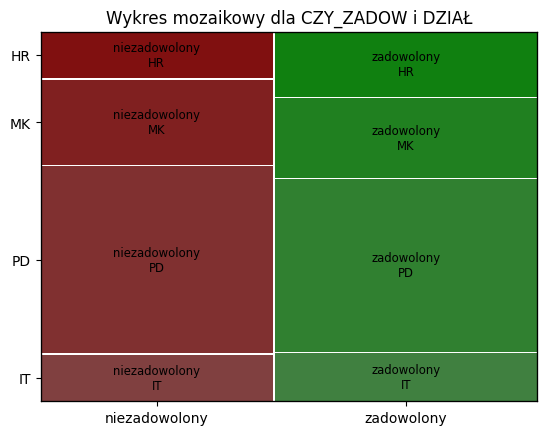

<Figure size 800x600 with 0 Axes>

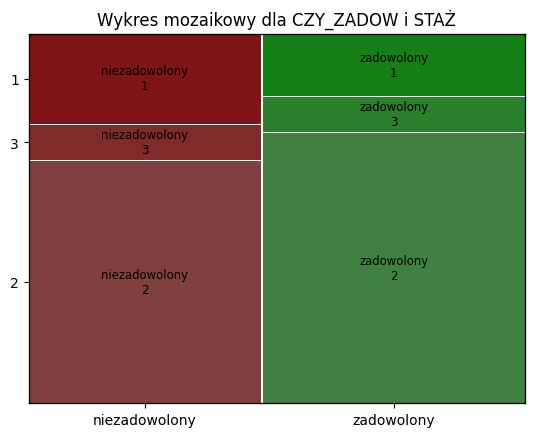

<Figure size 800x600 with 0 Axes>

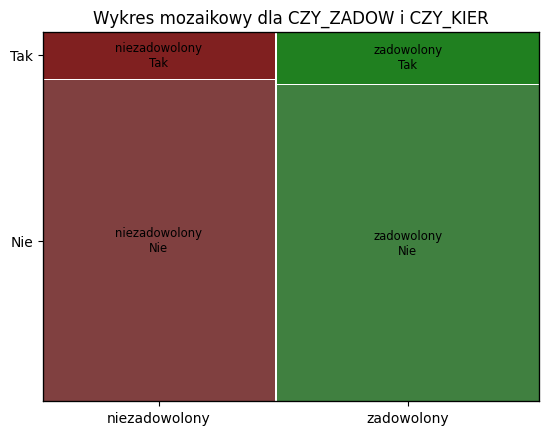

<Figure size 800x600 with 0 Axes>

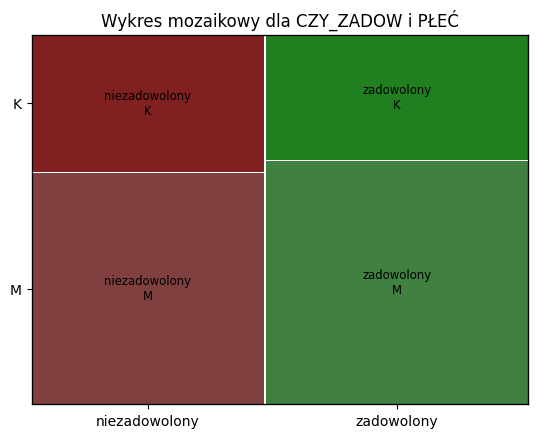

<Figure size 800x600 with 0 Axes>

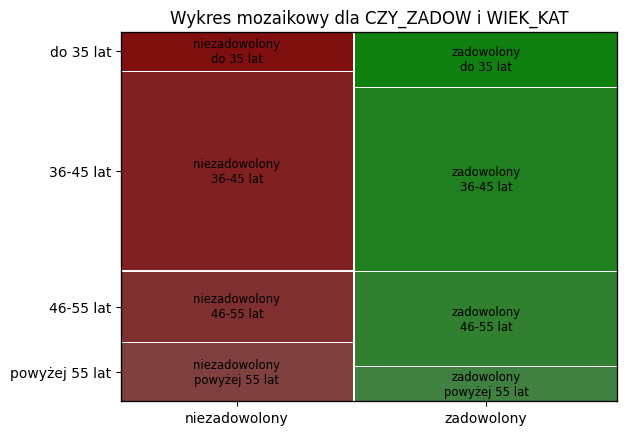

In [12]:
pary_zmiennych = [('CZY_ZADOW', 'DZIAŁ'), 
                  ('CZY_ZADOW', 'STAŻ'), 
                  ('CZY_ZADOW', 'CZY_KIER'), 
                  ('CZY_ZADOW', 'PŁEĆ'), 
                  ('CZY_ZADOW', 'WIEK_KAT')]

for zmienna1, zmienna2 in pary_zmiennych:
    plt.figure(figsize=(8, 6))
    mosaic(df, [zmienna1, zmienna2], title=f"Wykres mozaikowy dla {zmienna1} i {zmienna2}")
    plt.show()

Można sformułować wstępne hipotezy o relacjach między zmienną „CZY_ZADOW” (zadowolenie) a pozostałymi zmiennymi (DZIAŁ, STAŻ, CZY_KIER, PŁEĆ, WIEK_KAT). Kilka przykładowych hipotez:

- Zależność od działu

Hipoteza: W niektórych działach (np. PD) odsetek osób zadowolonych jest wyższy niż w innych (np. HR). Można przypuszczać, że specyfika pracy w danym dziale wpływa na poziom zadowolenia ze szkoleń.

- Zależność od stażu 

Hipoteza: Pracownicy o dłuższym stażu (kategorie 2 i 3) częściej deklarują wyższe zadowolenie w porównaniu z osobami o stażu krótszym (1). Istnieje możliwość, że lepiej znają oni ofertę szkoleń albo są bardziej przywiązani do firmy.

- Zależność od funkcji kierowniczej

Hipoteza: Pełnienie funkcji kierowniczej (Tak) wiąże się z innym poziomem satysfakcji niż praca na stanowiskach niekierowniczych (Nie). Możliwe, że menedżerowie mają dostęp do szkoleń wyższego poziomu lub oceniają je krytyczniej.

- Zależność od płci 

Hipoteza: Kobiety (K) i mężczyźni (M) mogą się różnić pod względem odsetka osób zadowolonych; przykładowo kobiety mogą częściej doceniać ofertę rozwojową, podczas gdy mężczyźni są bardziej niezadowoleni (lub odwrotnie).

- Zależność od wieku 

Hipoteza: Starsi pracownicy lub konkretne grupy wiekowe (np. 36–45 lat) mogą być bardziej (lub mniej) zadowoleni ze szkoleń w porównaniu z młodszymi (do 35 lat) lub najstarszymi (powyżej 55 lat).